In [1]:
import pandas as pd
breast = pd.read_csv('../data/breast-cancer.csv')
breast

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

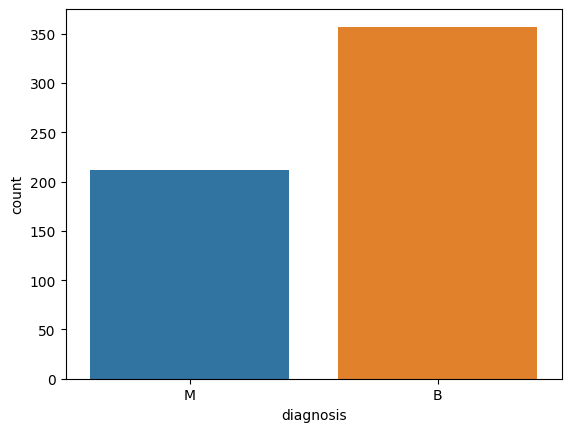

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure()
sns.countplot(x='diagnosis', data=breast)

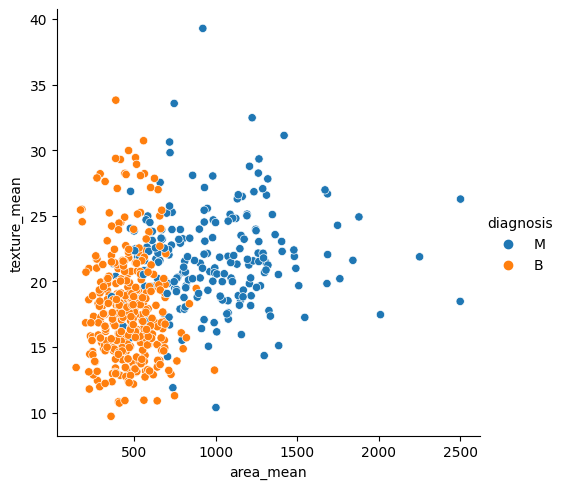

In [4]:
sns.relplot(x='area_mean', y='texture_mean', hue='diagnosis', data=breast)


In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
breast['diagnosis'] = np.where(breast['diagnosis']=='M', 1, 0)
feature = ['area_mean', 'area_worst']

X = breast[feature]
y = breast['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(398, 2) (171, 2)
(398,) (171,)


C:\Users\82103\anaconda3\envs\ADP\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator = DecisionTreeClassifier(), bootstrap_features=True)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print('Accuracy Score : {:.3f}'.format(clf.score(X_test, y_test)))

Accuracy Score : 1.000


In [18]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, pred),
            index = ['True[0]', 'True[1]'],
            columns = ['Pred[0]', 'Pred[1]'])

ValueError: Shape of passed values is (1, 1), indices imply (2, 2)

array([[171]], dtype=int64)

## BaggingRegressor

In [19]:
car = pd.read_csv('../data/CarPrice_Assignment.csv')
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [23]:
car_num = car.select_dtypes(['number'])
features = list(car_num.columns.difference(['car_ID', 'symboling', 'price']))
X = car_num[features]
y = car_num['price']
print(X.shape, y.shape)

(205, 13) (205,)


In [24]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
reg = BaggingRegressor(base_estimator = DecisionTreeRegressor(), oob_score=True)
reg = reg.fit(X, y)
reg.oob_score_

C:\Users\82103\anaconda3\envs\ADP\lib\site-packages\sklearn\ensemble\_bagging.py:1066: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


0.796601128507357

## Boosting

In [26]:
breast = pd.read_csv('../data/breast-cancer.csv')

breast['diagnosis'] = np.where(breast['diagnosis'] == 'M', 1, 0)
features = ['area_mean', 'texture_mean']

X = breast[features]
y = breast['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(398, 2) (171, 2)
(398,) (171,)


In [28]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(base_estimator=None)
pred = clf.fit(X_train, y_train).predict(X_test)
print('정확도 : ', clf.score(X_test, y_test))

정확도 :  0.9122807017543859


In [31]:
from sklearn.metrics import confusion_matrix, classification_report

print(pd.DataFrame(confusion_matrix(y_test, pred), 
                  index = ['True_' + str(s) for s in clf.classes_],
                  columns = ['pred_' + str(s) for s in clf.classes_]))

print(classification_report(y_test, pred))

        pred_0  pred_1
True_0     102       5
True_1      10      54
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       107
           1       0.92      0.84      0.88        64

    accuracy                           0.91       171
   macro avg       0.91      0.90      0.90       171
weighted avg       0.91      0.91      0.91       171



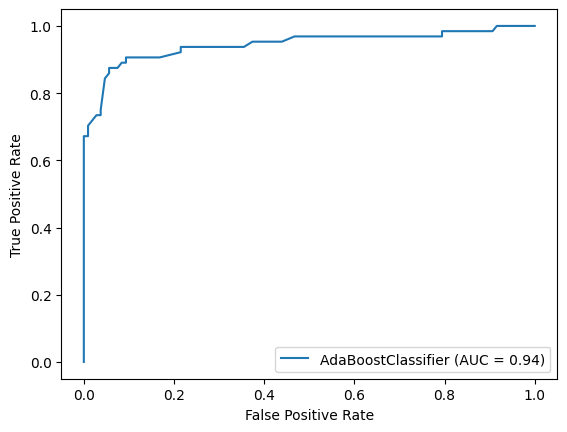

In [36]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf, X_test, y_test);

<AxesSubplot:>

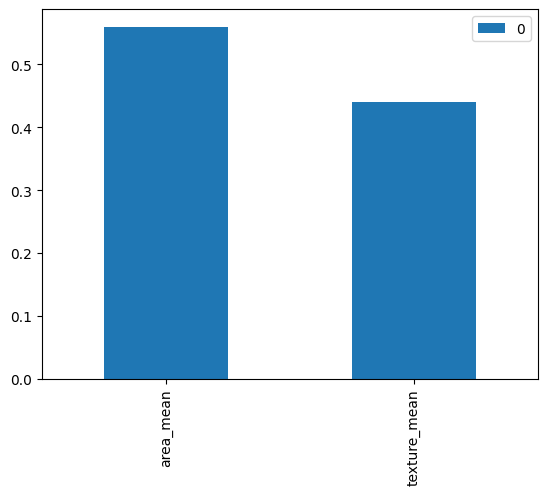

In [47]:
importances = pd.DataFrame(dict(zip(['area_mean', 'texture_mean'], [[i] for i in clf.feature_importances_]))).T

importances.plot(kind='bar')

## AdaBoostRegressor

In [48]:
features = list(car_num.columns.difference(['car_ID', 'symboling', 'price']))
X = car_num[features]
y = car_num['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(143, 13) (62, 13)
(143,) (62,)


In [50]:
from sklearn.ensemble import AdaBoostRegressor
reg = AdaBoostRegressor(base_estimator=None)
pred=reg.fit(X_train, y_train).predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(X_test, y_test)

print('MSE \t{:.2f}'.format(mse))
print('MAE \t{:.2f}'.format(mae))
print('RMSE \t{:.2f}'.format(rmse))
print('ACC \t{:.2f}'.format(acc))

MSE 	5659615.88
MAE 	1792.87
RMSE 	2378.99
ACC 	0.91


In [62]:
importances = reg.feature_importances_
columns_nm = pd.DataFrame(features)
feature_importances = pd.concat([columns_nm, pd.DataFrame(importances)],
                               axis=1)
feature_importances.columns = ['feature_name', 'importances']
feature_importances

,feature_name,importances
0,boreratio,0.017663
1,carheight,0.006023
2,carlength,0.005370
3,carwidth,0.045025
4,citympg,0.004601
5,compressionratio,0.002229
6,curbweight,0.102435
7,enginesize,0.634508
8,highwaympg,0.062767
9,horsepower,0.074873


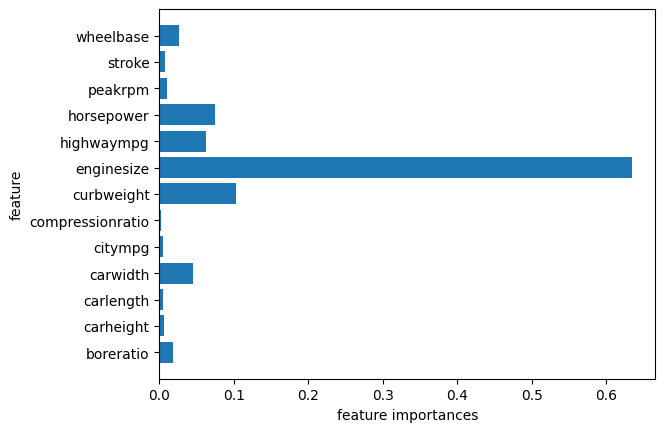

In [63]:
n_features = X_train.shape[1]
importances = reg.feature_importances_
column_nm = features

plt.barh(range(n_features), importances, align='center')
plt.yticks(np.arange(n_features), column_nm)
plt.xlabel('feature importances')
plt.ylabel('feature')
plt.ylim(-1, n_features)
plt.show()

## RandomForest

In [65]:
features = ['area_mean', 'texture_mean']
X = breast[features]
y = breast['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, 
                                                   random_state=1)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(398, 2) (171, 2)
(398,) (171,)


In [67]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, min_samples_split=5)
pred = clf.fit(X_train, y_train).predict(X_test)
print('정확도 : {:.2f} %'.format(clf.score(X_test, y_test) * 100))

정확도 : 89.47 %


In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
pred=clf.predict(X_test)
test_cm=confusion_matrix(y_test, pred)
test_acc=accuracy_score(y_test, pred)
test_prc=precision_score(y_test, pred)
test_rcll=recall_score(y_test, pred)
test_f1=f1_score(y_test, pred)
print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc *100,2)))
print('정밀도\t{}%'.format(round(test_prc *100,2)))
print('재현율\t{}%'.format(round(test_rcll *100,2)))

[[103   4]
 [ 14  50]]


정확도	89.47%
정밀도	92.59%
재현율	78.12%


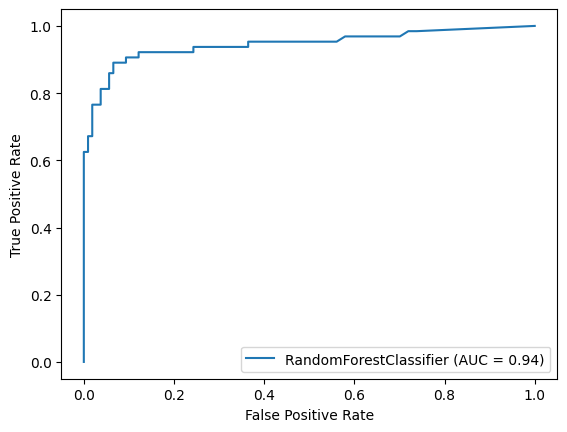

In [71]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve, roc_auc_score
plot_roc_curve(clf, X_test, y_test)
plt.show()

In [73]:
importances = clf.feature_importances_
columns_nm = pd.DataFrame(['area_mean', 'texture_mean'])
feature_importances = pd.concat([columns_nm, 
                                pd.DataFrame(importances)], 
                                axis=1)
feature_importances.columns = ['feature_nm', 'importances']
feature_importances

,feature_nm,importances
0,area_mean,0.696481
1,texture_mean,0.303519


<BarContainer object of 2 artists>

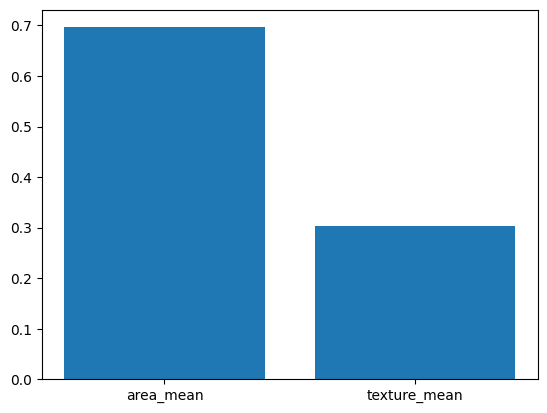

In [74]:
f= features
xtick_label_position = list(range(len(f)))
plt.xticks(xtick_label_position, f)
plt.bar([x for x in range(len(importances))], importances)

In [76]:
car = pd.read_csv("../data/CarPrice_Assignment.csv")
car_num = car.select_dtypes(['number'])
features = list(car_num.columns.difference(['car_ID', 'symboling', 'price']))
X=car_num[features]
y=car_num['price']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state =1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(143, 13)
(62, 13)
(143,)
(62,)


In [77]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
pred=reg.fit(x_train, y_train).predict(x_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(x_test, y_test)
print('MSE\t{}'.format(round(mse,3)))
print('MAE\t{}'.format(round(mae,3)))
print('RMSE\t{}'.format(round(rmse,3)))
print('ACC\t{}%'.format(round(acc *100,3)))

MSE	4324592.997
MAE	1341.86
RMSE	2079.566
ACC	92.837%


In [78]:
importances = reg.feature_importances_
column_nm = pd.DataFrame(features)
feature_importances = pd.concat([column_nm,
                                 pd.DataFrame(importances)],
                                axis=1)
feature_importances.columns = ['feature_nm', 'importances']
print(feature_importances)

          feature_nm  importances
0          boreratio     0.003433
1          carheight     0.004712
2          carlength     0.006123
3           carwidth     0.033350
4            citympg     0.006337
5   compressionratio     0.004018
6         curbweight     0.189658
7         enginesize     0.651440
8         highwaympg     0.056821
9         horsepower     0.018680
10           peakrpm     0.006486
11            stroke     0.004083
12         wheelbase     0.014860


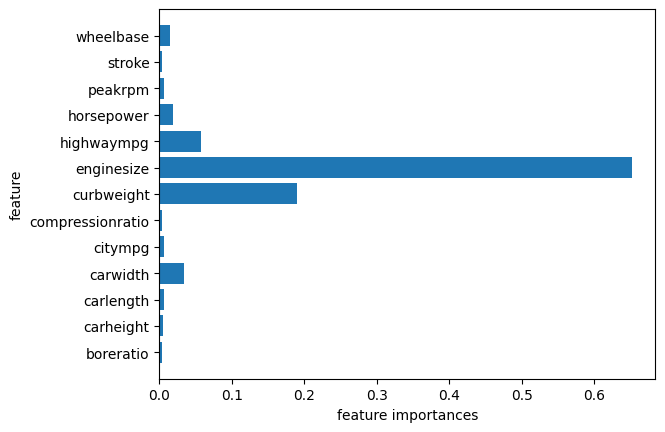

In [81]:
n_features = x_train.shape[1]
importances = reg.feature_importances_
column_nm = features

plt.barh(range(n_features), importances, align='center')
plt.yticks(np.arange(n_features), column_nm)
plt.xlabel('feature importances')
plt.ylabel('feature')
plt.ylim(-1, n_features)
plt.show()